# PROJECT OVERVIEW

Using data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.

# BUSINESS PROBLEM

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

# BUSINESS UNDERSTANDING

From the business problem, I understand that the company wants to join the aviation industry. since they have no knowledge on the potential risks of aircrafts, I need to analyse data from the past ongoings with aircrafts for them, get the best aircraft with less shortcomings and the best manufacturer for the company.

# THE DATA

In the data folder is a datasetLinks to an external site (https://www.kaggle.com/datasets/drealbash/aviation-accident-from-1919-2023/data) from the National Transportation Safety Board that includes aviation accident data from 1919 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

In [36]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#loading the dataset
df=pd.read_csv('aviation-accident-data-2023-05-16.csv')
df

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


# DATA UNDERSTANDING

Here, I am checking for any misssing values and unneccesary values before cleaning and make use of the data by analysing it for the company.

In [38]:
#getting the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [39]:
#checking for missing values
df.isna().sum()

date               0
type               0
registration    1548
operator           4
fatalities      3938
location         948
country            0
cat                0
year               0
dtype: int64

# DATA PREPARATION

The data given contains some missing values that need to be removed. Therefore, in cleaning of the data, I will eliminate the missing values, check for duplicates and remove them.

In [40]:
#Droppinng the missing values
df.dropna(inplace=True)

In [41]:
#acertaining the number of missing values have been dropped
df.isna().sum()

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

In [42]:
# Checking for duplicate values
df.duplicated().sum()

1

In [43]:
#Dropping the duplicate value
df.drop_duplicates(inplace=True)

In [44]:
#Ascertaining the number of duplicate values have been dropped
df.duplicated().sum()


0

In [45]:
df

,date,type,registration,operator,fatalities,location,country,cat,year
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
7,date unk.,Antonov An-2,CCCP-01216,Aeroflot,0,Chita region,Russia,A2,unknown
9,date unk.,Antonov An-26,01 red,Soviet AF,0,Orenburg Air Base,Russia,O1,unknown
10,date unk.,Antonov An-26,RA-47415,Russian AF,0,Belgorod Airport...,Russia,A1,unknown
13,date unk.,Antonov An-2R,-,PZL-Mielec,0,Mielec,Poland,O1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [46]:
#Getting rid of the unkown years
df=df[df['year'] != 'unknown']
df

,date,type,registration,operator,fatalities,location,country,cat,year
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,23-FEB-1920,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
66,14-DEC-1920,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [47]:
df.country.unique()

array(['U.K.', 'South Africa', 'Sudan', 'Sweden', 'India', 'France',
       'Belgium', 'Netherlands', 'Atlantic Ocean', 'Germany', 'USA',
       'Italy', 'Cuba', 'Iran', 'Chile', 'Israel', 'Argentina',
       'Nicaragua', 'Czech Rep.', 'Dominican Rep.', 'Brazil',
       'Mediterranean Sea', 'Indonesia', 'Egypt', 'Honduras', 'Bolivia',
       'Spain', 'Peru', 'Australia', 'Poland', 'Iraq', 'Mexico', 'Russia',
       'Malta', 'Colombia', 'Switzerland', 'Austria', 'China',
       'Trinidad & Tobago', 'Norway', 'Greece', 'Libya', 'Guatemala',
       'Algeria', 'Pakistan', 'Panama', 'Romania', 'Morocco', 'Bulgaria',
       'Pacific Ocean', 'Jamaica', 'Kenya', 'Hungary', 'Canada', 'Gambia',
       'Philippines', 'Japan', 'Ecuador', 'Puerto Rico', 'Venezuela',
       'Mozambique', 'Singapore', 'Myanmar', 'Djibouti', 'Gibraltar',
       'Indian Ocean', 'Denmark', 'Finland', 'Estonia', 'Vietnam',
       'Tanzania', 'Iceland', 'Benin', 'Costa Rica', 'Portugal',
       'P.N. Guinea', 'Uzbekistan'

In [48]:
df.operator.unique()

array(['RAF', 'Handley Page Transport', 'HP Indo-Burmese Transport', ...,
       'Angkasa Super Services', 'Nasional Global Aviasi', 'Bar Aviation'],
      dtype=object)

# DATA ANALYSIS AND VISUALIZATION

After the data cleaning, I can now analyse the data getting information about the aircrafts and operators with the less accidents

In [49]:
df['year'] = df['year'].astype(int)

<ipython-input-49-4358701cf1a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)


In [50]:
accidents_per_year=df['year'].value_counts().sort_index()
accidents_per_year

1919      1
1920      4
1921      4
1922      2
1923      5
       ... 
2019    235
2020    190
2021    172
2022    163
2023     55
Name: year, Length: 105, dtype: int64

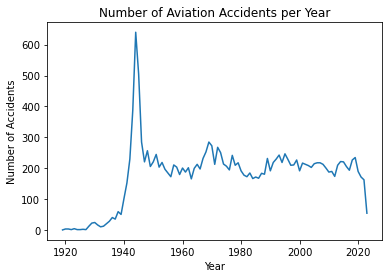

In [51]:
#creating a plot to visualize the number of accidents per year
plt.plot(accidents_per_year.index, accidents_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Aviation Accidents per Year')
plt.show()

In [52]:
#changing the datatype of fatalities to numeric
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')

<ipython-input-52-5687291f3efe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')


In [53]:
fatalities_per_year=df.groupby('year')['fatalities'].sum()
fatalities_per_year

year
1919      1.0
1920      4.0
1921      2.0
1922      5.0
1923      7.0
        ...  
2019    419.0
2020    330.0
2021    268.0
2022    276.0
2023     88.0
Name: fatalities, Length: 105, dtype: float64

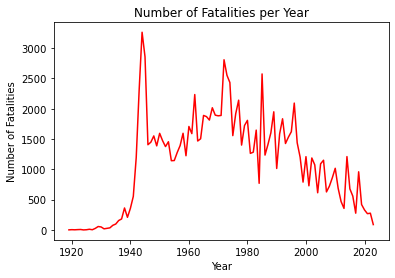

In [54]:
#Plotting the fatalities per year
plt.plot(fatalities_per_year.index, fatalities_per_year.values, color='red')
plt.xlabel('Year')  
plt.ylabel('Number of Fatalities')
plt.title('Number of Fatalities per Year')
plt.show()

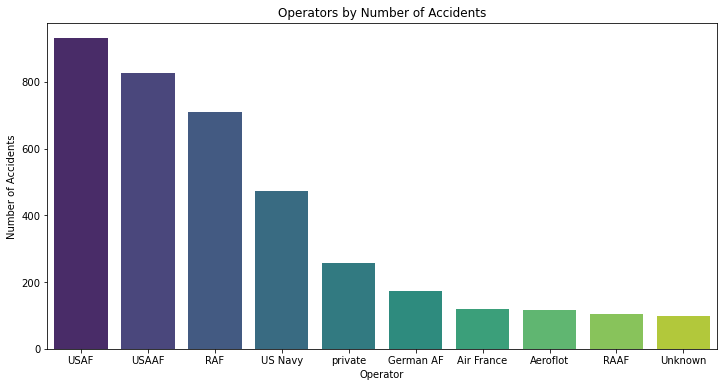

In [55]:
#plotting operator against accidents
operator_counts = df['operator'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=operator_counts.index, y=operator_counts.values, palette='viridis')
plt.xlabel('Operator')
plt.ylabel('Number of Accidents')
plt.title('Operators by Number of Accidents')
plt.show()

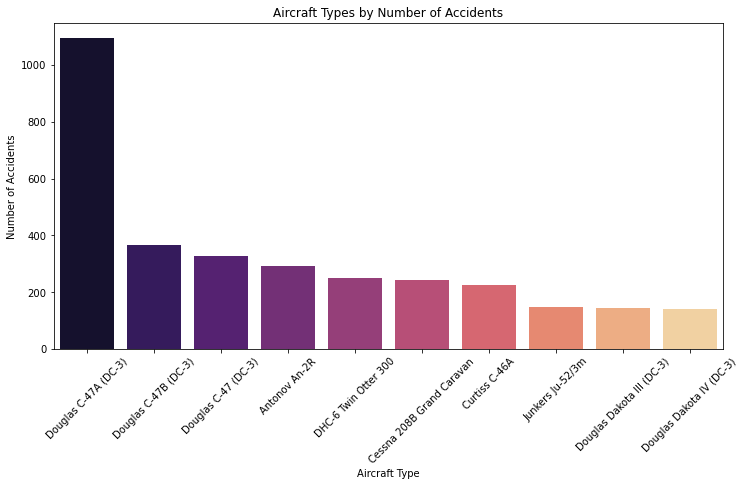

In [56]:
#plotting type of aircraft against accidents caused
aircraft_counts = df['type'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=aircraft_counts.index, y=aircraft_counts.values, palette='magma')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Accidents')
plt.title('Aircraft Types by Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [57]:
df.to_csv('cleaned_aviation_data.csv', index=False)

# CONCLUSION

The high accident rate between 1940 and 1945 was due to the World War II. This explains why the United States Airforce (USAF) and United States Army Airforce (USAAF) had the highest number of accidents since the United States actively Participated in the WorldWar. The aircraft Douglas C-47A (DC-3) recorded the highest number of accidents since it was one of the most important aircraft of the World War II therefore often used. 